```
  @..@    古池や
 (----)    蛙飛び込む
( >__< )    水の音
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import randy
frog = randy.Randy()

In [3]:
SAMPLES = 5_000

## Sigma Random

In [4]:
stat = pd.DataFrame()
for s in np.linspace(0, 1, num=6):
    samples = [frog.sigma_random(a=2, b=10, loc=4, strength=s) for _ in range(SAMPLES)]
    stat[f'{s:g}'] = samples

(0.0, 500.0)

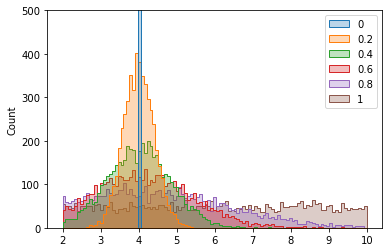

In [5]:
fig, ax = plt.subplots()
sns.histplot(stat, element='step', stat='count', common_norm=False, alpha=.3, ax=ax)
ax.set_ylim(0, SAMPLES/10)

<AxesSubplot:ylabel='Probability'>

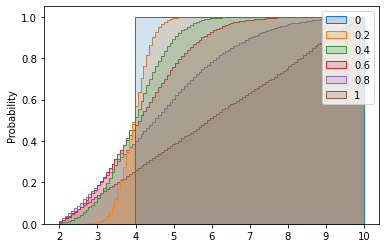

In [6]:
sns.histplot(stat, element='step', stat='probability', cumulative=True, common_norm=False, alpha=.2)

## Sigma Choice

In [7]:
seq = list("ABCDEF")

data = list()
for s in np.linspace(1, 0, num=6):
    samples = [frog.sigma_choice(seq, loc=2, strength=s) for _ in range(SAMPLES)]
    df = pd.DataFrame()
    df[f'letter'] = samples
    df['strength'] = int(s*10)/10
    data.append(df)
stat = pd.concat(data)

<AxesSubplot:xlabel='letter', ylabel='count'>

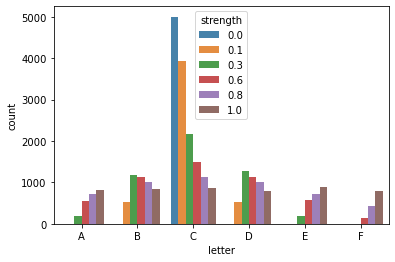

In [8]:
sns.countplot(x='letter', hue='strength', data=stat, order=seq, alpha=.9)

## Boolean

In [9]:
data = list()
for s in np.linspace(0, 1, num=6):
    samples = [frog.boolean(p_true=s) for _ in range(SAMPLES)]
    df = pd.DataFrame()
    df[f'boolean'] = samples
    df['p'] = int(s*10)/10
    data.append(df)
stat = pd.concat(data)

<AxesSubplot:xlabel='boolean', ylabel='count'>

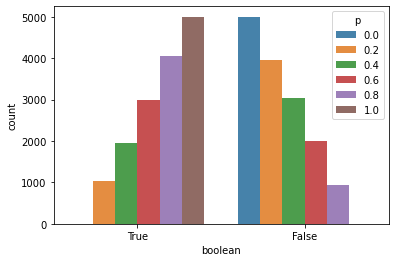

In [10]:
sns.countplot(x='boolean', hue='p', data=stat, order=[True, False], alpha=.9)